# Исследовательский анализ данных - Бронирование отелей

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Определение структуры данных

### 1.1 Чтение данных

In [31]:
df = pd.read_csv('dataset/hotel_booking.csv')  
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Определим размер датасета:

In [91]:
print("Размер датасета: ", df.shape)

Размер датасета:  (119390, 36)


Проверим наличие дубликатов:

In [67]:
df.drop_duplicates(inplace=True, ignore_index=False)
df.shape

(119390, 36)

### 1.2 Описание данных

- Определим, какие данные хранятся в каждом столбце (найдем все уникальные значения)

In [89]:
pd.set_option('display.max_colwidth', 100) # Максимальная ширина столбца

In [90]:
df_unique = pd.DataFrame(columns=['Name', 'Values'])
for col in df:
    if df[col].nunique()<15:
        df_unique = pd.concat([df_unique, pd.DataFrame([[col, df[col].unique()]], columns=['Name', 'Values'])], ignore_index = True )
    else:
        df_unique = pd.concat([df_unique, pd.DataFrame([[col, [df[col].unique()[:3], '...']]], columns=['Name', 'Values'])], ignore_index = True )
df_unique

,Name,Values
0,hotel,"[Resort Hotel, City Hotel]"
1,is_canceled,"[0, 1]"
2,lead_time,"[[342, 737, 7], ...]"
3,arrival_date_year,"[2015, 2016, 2017]"
4,arrival_date_month,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,"[[27, 28, 29], ...]"
6,arrival_date_day_of_month,"[[1, 2, 3], ...]"
7,stays_in_weekend_nights,"[[0, 1, 2], ...]"
8,stays_in_week_nights,"[[0, 1, 2], ...]"
9,adults,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


**Произведем анализ для получения представления о данных**

- Добавим столбец с полной датой прибытия:

In [182]:
# Объединим столбцы с годом, месяцем и днем прибытия
df['arrival_date'] = df['arrival_date_year'].astype(str).str.cat( \
    df['arrival_date_month'].str.cat(df['arrival_date_day_of_month'].astype(str), sep =" "), sep =" ") 
# Преобразуем в формат даты
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df[['arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].sample(n=5)

,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month
21446,2016-02-26,2016,February,26
14586,2016-09-12,2016,September,12
105000,2017-01-22,2017,January,22
36233,2017-05-05,2017,May,5
103547,2016-12-24,2016,December,24


- Определим диапазон дат, представленных в наборе данных:

In [183]:
print("Диапазон дат прибытия: ", df['arrival_date'].min(), "-", df['arrival_date'].max())

Диапазон дат прибытия:  2015-07-01 00:00:00 - 2017-08-31 00:00:00


- Определим статусы бронирования, соответстувующие отмене заказа:

In [138]:
print("Подтвержденный заказ: ",df[df['is_canceled']==0]['reservation_status'].unique())
print("Отмененный заказ: ",df[df['is_canceled']==1]['reservation_status'].unique())

Подтвержденный заказ:  ['Check-Out']
Отмененный заказ:  ['Canceled' 'No-Show']


**Теперь мы имеем следующее представление о наборе данных:**

- Содержит 119390 строки; 
- Записи представлены для Resort Hotel и City Hotel;
- Каждое наблюдение представляет бронирование отеля в период с 1 июля 2015 года по 31 августа 2017 года, включая бронирование, которое было отменено.

**hotel** - отель (Resort Hotel или City Hotel);    
**is_canceled** - бронирование отменено (1/0);  
**lead_time** - количество дней, прошедших между датой бронирования и датой прибытия;    
**arrival_date_year** - год прибытия;  
**arrival_date_month** - месяц прибытия;  
**arrival_date_week_number** - номер недели прибытия;  
**arrival_date_day_of_month** - день прибытия;  
**stays_in_weekend_nights** - количество ночей выходных (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле;  
**stays_in_week_nights** - количество ночей в будни (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле;  
**adults** - количество взрослых;  
**children** - количество детей;  
**babies** - количество младенцев;  
**meal** - питание (BB – Bed & Breakfas, SC – Self Catering, ...);  
**country** - cтрана гостя;  
**market_segment** - обозначение сегмента рынка (TA - Travel Agents, TO - Tour Operators);  
**distribution_channel** - канал распространения бронирования;  
**is_repeated_guest** - постоянный гость (1/0);  
**previous_cancellations** - количество предыдущих бронирований, которые были отменены гостем до текущего бронирования;  
**previous_bookings_not_canceled** - количество предыдущих бронирований, не отмененных гостем до текущего бронирования;  
**reserved_room_type** - тип забронированного номера;  
**assigned_room_type** - тип номера, выданного клиенту (иногда назначенный тип номера отличается от забронированного по причинам работы отеля или по запросу клиента);    
**booking_changes** - количество изменений, внесенных в бронирование с момента ввода бронирования до момента регистрации заезда или отмены бронирования;  
**deposit_type** - тип депозита (No Deposit – депозит не внесен, Refundable – внесен депозит в размере стоимости проживания,  Not Refundable – был внесен депозит на сумму, меньшую общей стоимости проживания);  
**agent** - ID туристического агентства, осуществившего бронирование;  
**company** - идентификатор компании, осуществившей бронирование или ответственного за оплату бронирования;  
**days_in_waiting_list** - количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту;  
**customer_type** - тип клиента (Group – бронирование связано с группой, Transient – бронирование не является частью группы или контракта и не связано с другим временным бронированием; Transient-Party - бронирование является временным, но связано, по крайней мере, с другим временным бронированием);  
**adr** - Average Daily Rate (рассчитывается путем деления суммы всех транзакций по размещению на количество ночей проживания);  **required_car_parking_spaces** - количество парковочных мест, требуемых клиентом;  
**total_of_special_requests** - количество специальных запросов, сделанных клиентом;  
**reservation_status** - статус бронирования (Check-Out - клиент зарегистрировался, но уже отбыл, Canceled - бронирование отменено, No-Show - клиент не зарегистрировался и не сообщил отелю причину);   
**reservation_status_date** - дата, на которую был установлен последний статус.

## 2. Выявление аномалий и выбросов

- Получим информацию о типе данных и пропущенных значениях для каждого столбца:

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Пропущенные значения есть в столбцах "country", "agent", "children", "company"

- Заполним пропущенные значения в стобце "children" нулями

In [135]:
df['children'] = df['children'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
# TODO: обработать выбросы и отрицательные значения

- Определим, в каком отношении распределяются заказы по отелям:

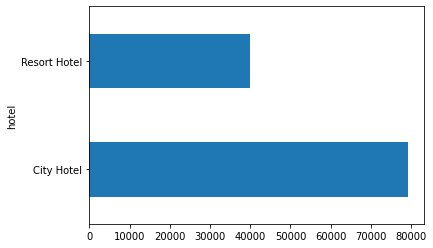

In [155]:
d = df.groupby('hotel')['hotel'].count().plot(kind='barh')

- Определим суммарный ADR за каждый год для каждого отеля:

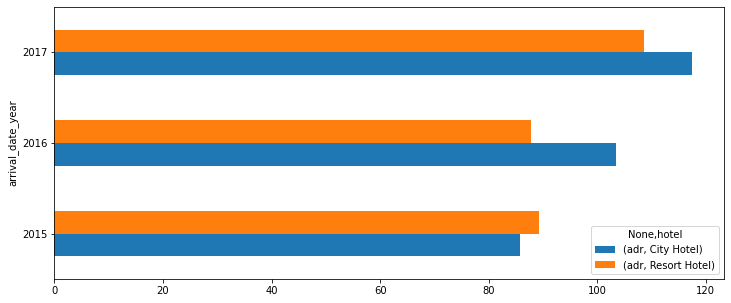

In [166]:
adr_sum = pd.pivot_table(data=df, index = ["arrival_date_year"],
               columns=["hotel"],
               values=["adr"]).plot.barh(figsize=(12,5))

<AxesSubplot:ylabel='Frequency'>

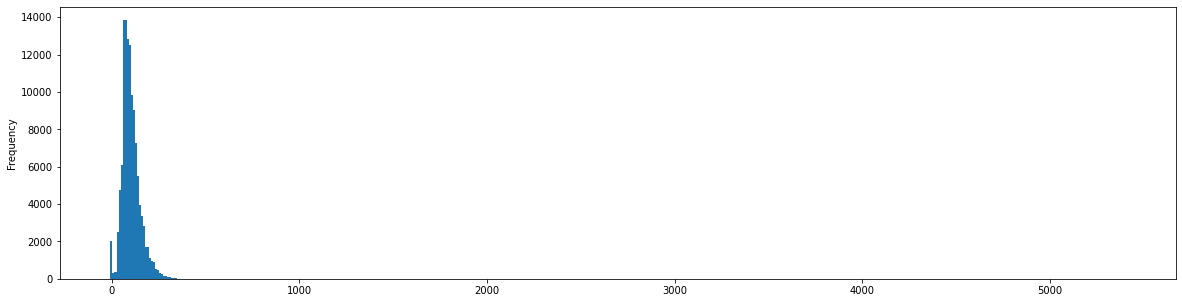

In [181]:
df['adr'].plot(kind='hist', bins=500, figsize=(20, 5))

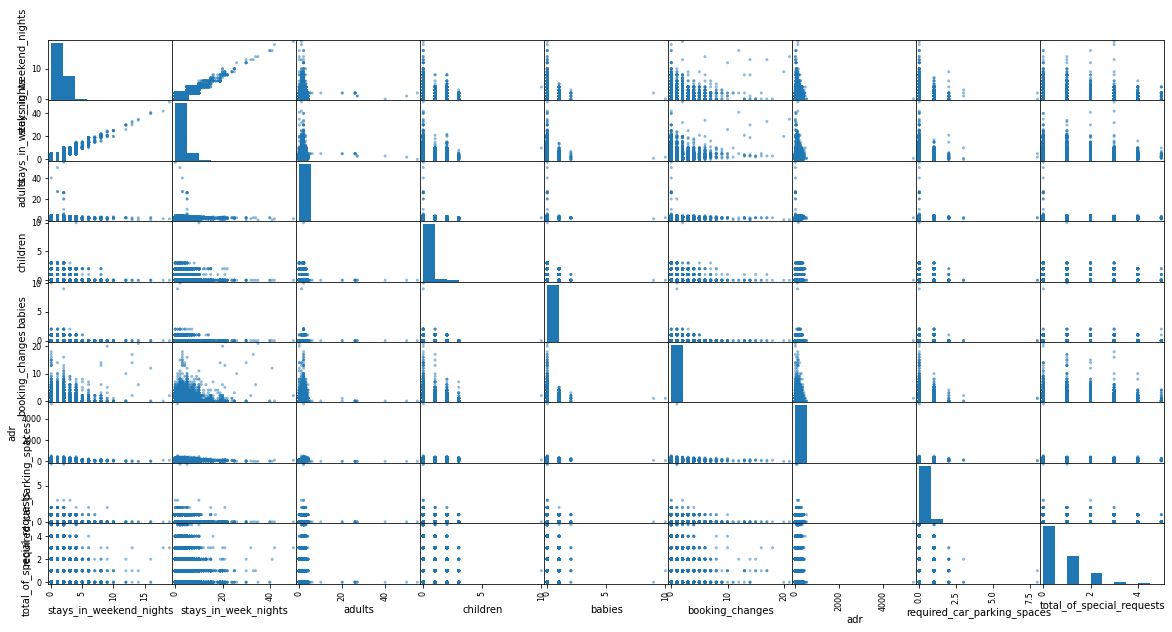

In [171]:
pd.plotting.scatter_matrix(df[["stays_in_weekend_nights",
                              "stays_in_week_nights", "adults", "children", "babies",
                              "booking_changes",
                              "adr", "required_car_parking_spaces",
                              "total_of_special_requests"]], figsize=(20,10));

<AxesSubplot:>

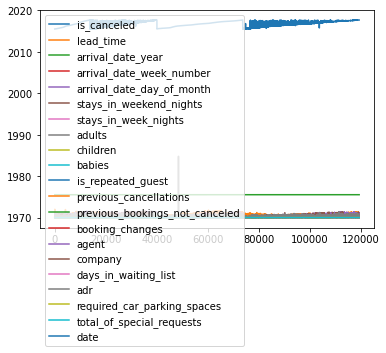

In [140]:
df.plot()